In [100]:
import spacy 
import pandas as pd
import numpy as np

In [101]:
notes = pd.read_csv('NOTEEVENTS.csv')
diagnoses = pd.read_csv('DIAGNOSES_ICD.csv')
patients = pd.read_csv('PATIENTS.csv')

C:\Users\alejm\AppData\Local\Temp\ipykernel_22120\2255944130.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  notes = pd.read_csv('NOTEEVENTS.csv')


In [102]:
diagnoses_labels = pd.read_csv('D_ICD_DIAGNOSES.csv')
icd9_dict = diagnoses_labels.set_index('ICD9_CODE')['SHORT_TITLE'].to_dict()

merged = pd.merge(diagnoses, patients, on=['SUBJECT_ID'])
merged['SHORT_TITLE'] = merged['ICD9_CODE'].map(icd9_dict)
merged.drop(columns=['ROW_ID_y', 'ROW_ID_x'], inplace=True)

In [103]:
pulm_embol = merged[merged['SHORT_TITLE'].str.contains('pulm embol', case=False, na=False)]

In [104]:
pulm_embol.head()

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,SHORT_TITLE
2542,150,108732,2.0,41519,F,2123-09-14 00:00:00,2161-10-13 00:00:00,2161-10-13 00:00:00,2161-10-13 00:00:00,1,Pulm embol/infarct NEC
3564,269,106296,3.0,41519,M,2130-09-30 00:00:00,NaN,NaN,NaN,0,Pulm embol/infarct NEC
3585,272,164716,1.0,41519,M,2119-11-21 00:00:00,NaN,NaN,NaN,0,Pulm embol/infarct NEC
5582,592,180029,17.0,41519,M,2058-04-27 00:00:00,2121-08-14 00:00:00,2121-08-14 00:00:00,2121-08-14 00:00:00,1,Pulm embol/infarct NEC
5843,492,114598,4.0,41519,M,2134-03-16 00:00:00,NaN,NaN,NaN,0,Pulm embol/infarct NEC


In [105]:
df1 = pd.merge(pulm_embol, notes, on=['HADM_ID'])
df1.drop(columns=['ROW_ID', 'SUBJECT_ID_y'], inplace=True)
df1.rename(columns={'SUBJECT_ID_x': 'SUBJECT_ID'}, inplace=True)
df1 = df1[df1['CATEGORY'] == 'Discharge summary']

In [106]:
from spacy import displacy
nlp = spacy.load(r'en_ner_bc5cdr_md-0.5.4\en_ner_bc5cdr_md-0.5.4\en_ner_bc5cdr_md\en_ner_bc5cdr_md-0.5.4')
#nlp = spacy.load(r'en_core_sci_md-0.5.4\en_core_sci_md-0.5.4\en_core_sci_md\en_core_sci_md-0.5.4')

In [116]:
text = df1['TEXT'].to_list()[11]
doc = nlp(text)
displacy.render(doc, style='ent', jupyter=True)

In [108]:
for i in range(len(doc.ents)):
    print(doc.ents[i].label_, doc.ents[i].text)

CHEMICAL Bactrim
CHEMICAL Sulfonamides
DISEASE Shortness of breath
DISEASE Left leg swelling

Major Surgical or Invasive Procedure:
None.
DISEASE hypertension
DISEASE multiple complaints
DISEASE pain
DISEASE shortness of breath
DISEASE cough
CHEMICAL LLE swelling
DISEASE pain
CHEMICAL LLE swelling
CHEMICAL PE
DISEASE DVT
DISEASE coagulopathy
DISEASE anemia
DISEASE thrombocytopenia
DISEASE bleeding
DISEASE dyspnea
DISEASE chest pain
CHEMICAL LLE swelling
DISEASE pain
DISEASE bronchiolitis
DISEASE fever
DISEASE chills
DISEASE lymphadenopathy
DISEASE sweats
DISEASE weight loss
DISEASE pruritus
CHEMICAL BRBPR
DISEASE dry cough
DISEASE swelling
DISEASE Hypertension
DISEASE Osteopenia
DISEASE pneumonia
DISEASE liver hemangioma
DISEASE psoriasis
DISEASE Diverticulosis
DISEASE heart disease
DISEASE HTN
DISEASE stomach cancer
DISEASE lung cancer
DISEASE lymphadenopathy
DISEASE decreased breath sounds
DISEASE hepatosplenomegaly
DISEASE edema
DISEASE erythema
CHEMICAL LLE
DISEASE EOS-1.6
DISEASE 

In [117]:
import gensim
from gensim.models import Word2Vec
import sklearn
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

small_df1 = df1['TEXT'].to_list()[0:10]

corpus = []
for row in range(0, len(small_df1)):
    str_tokens = []
    tokens = nlp(small_df1[row]).ents
    for i in range(len(tokens)):
        str_tokens.append(tokens[i].text)
    corpus.append(str_tokens)

model = Word2Vec(corpus, min_count=1)


In [120]:
model.wv.get_vector('chest pain')

array([-9.70073696e-03,  9.32924263e-03,  4.38223872e-03,  9.28792078e-03,
        6.70101028e-03,  2.05144542e-03,  1.00011919e-02, -3.57044418e-03,
       -7.03029800e-03,  4.13368503e-03,  3.69300088e-03, -6.21655537e-03,
        9.69493110e-03, -3.43002658e-03,  9.62869264e-03,  6.72475493e-04,
       -6.30251039e-03, -2.37836060e-03, -7.44372886e-03, -3.95147502e-03,
        1.18027790e-03,  9.92450677e-03,  9.49027296e-03, -6.82895305e-03,
        3.37530603e-03,  2.33322848e-03, -2.94942223e-03, -9.75484867e-03,
        6.48387591e-04, -8.04579165e-03,  6.81741210e-03, -5.45550371e-03,
        5.79878176e-03,  9.96552780e-03, -6.86940155e-04,  5.20014064e-03,
       -1.92290801e-03,  6.75558951e-03,  3.56201222e-03, -1.00934189e-02,
       -2.41658720e-03,  3.21066123e-03, -9.47048538e-05, -1.49254722e-03,
       -6.13518467e-04, -1.71621889e-03,  2.30519523e-04,  3.88788851e-03,
       -4.12468612e-03, -3.74546368e-03,  2.41838890e-04, -3.38855869e-04,
       -1.01240366e-04, -

In [110]:
def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)

    tokens = np.array(tokens)

    n_samples = len(tokens)
    perplexity = min(30, n_samples - 1)
    tsne_model = TSNE(perplexity=perplexity, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

c:\Users\alejm\miniconda3\envs\healthcareAI\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


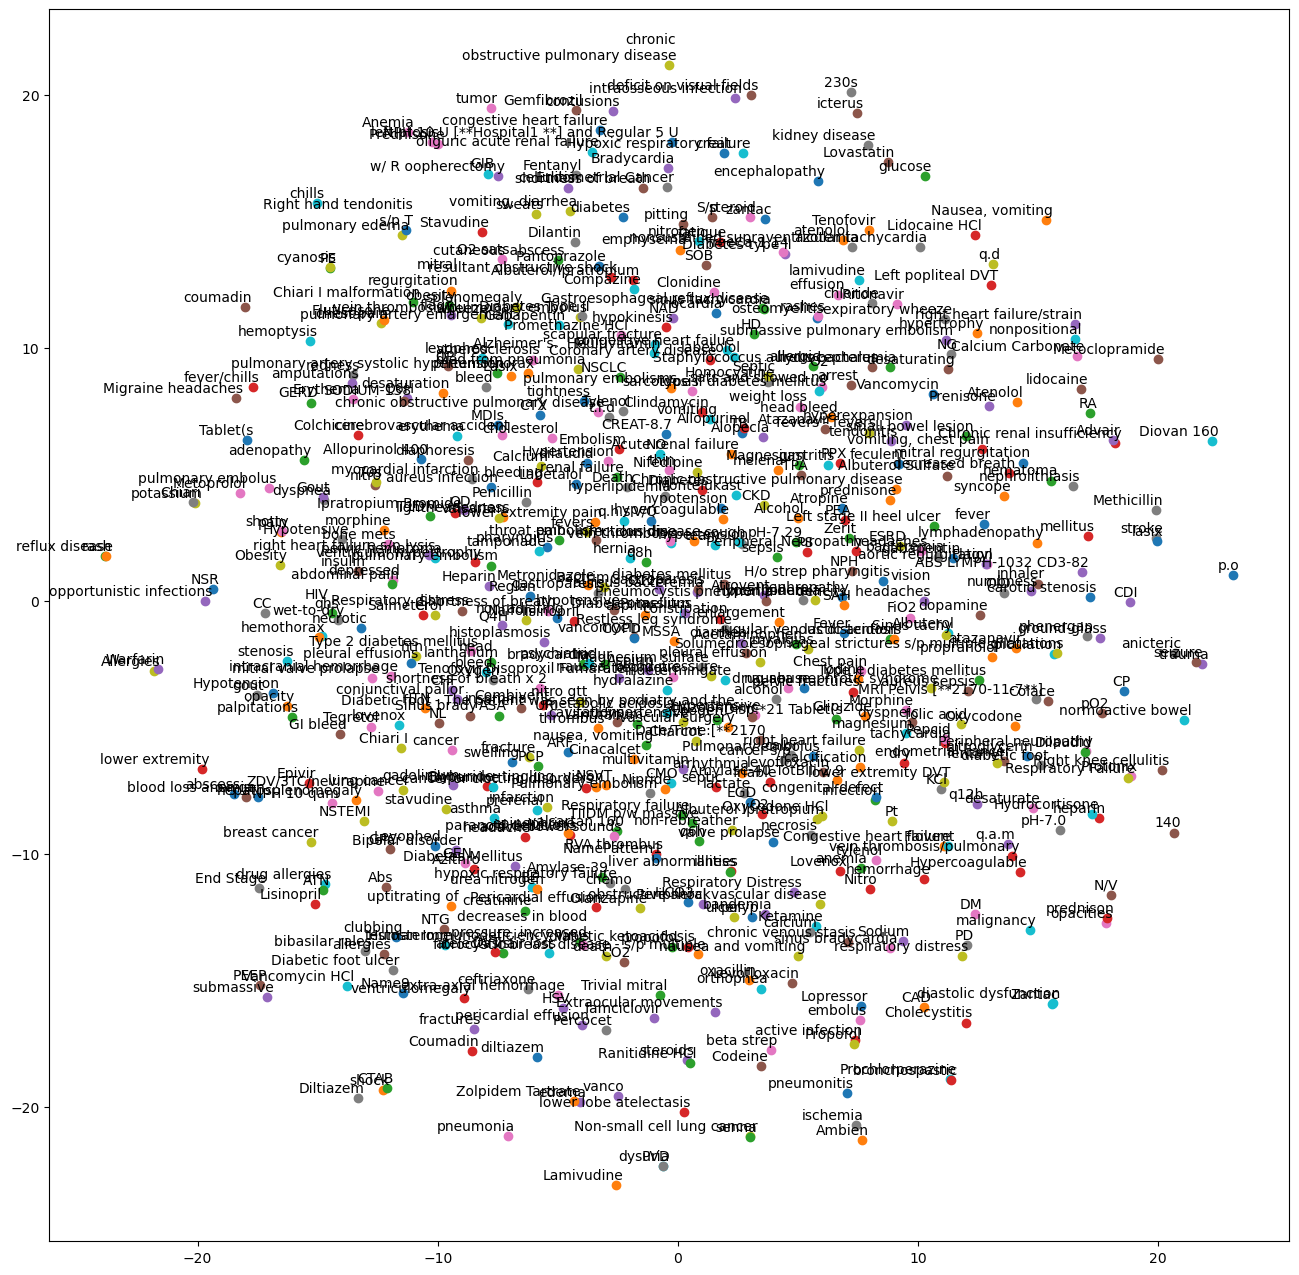

In [111]:
tsne_plot(model)

In [112]:
central_cord = merged[merged['SHORT_TITLE'].str.contains('central cord', case=False, na=False)]

df2 = pd.merge(central_cord, notes, on='HADM_ID')
df2.drop(columns=['ROW_ID', 'SUBJECT_ID_y'], inplace=True)
df2.rename(columns={'SUBJECT_ID_x': 'SUBJECT_ID'}, inplace=True)

df2 = df2[df2['CATEGORY'] == 'Discharge summary']

df2.head()

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,SHORT_TITLE,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
3,22251,199522,1.0,95203,F,2036-04-20 00:00:00,2119-01-12 00:00:00,NaN,2119-01-12 00:00:00,1,Central cord synd/c1-c4,2117-11-02,NaN,NaN,Discharge summary,Report,NaN,NaN,Unit No: [**Numeric Identifier 63721**]\nAdmi...
109,22251,199522,7.0,95208,F,2036-04-20 00:00:00,2119-01-12 00:00:00,NaN,2119-01-12 00:00:00,1,Central cord synd/c5-c7,2117-11-02,NaN,NaN,Discharge summary,Report,NaN,NaN,Unit No: [**Numeric Identifier 63721**]\nAdmi...
215,25588,135412,1.0,95203,F,2090-04-21 00:00:00,NaN,NaN,NaN,0,Central cord synd/c1-c4,2161-07-06,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2161-7-2**] Discharg...
231,30741,155594,7.0,95208,F,2088-08-12 00:00:00,NaN,NaN,NaN,0,Central cord synd/c5-c7,2157-09-12,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2157-8-25**] ...
320,28869,118633,1.0,95208,M,2088-06-17 00:00:00,NaN,NaN,NaN,0,Central cord synd/c5-c7,2148-09-16,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2148-8-20**] ...


In [113]:
text = df2['TEXT'].to_list()[0]
doc = nlp(text)
displacy.render(doc, style='ent', jupyter=True)

In [114]:
for i in range(len(doc.ents)):
    print(doc.ents[i].label_, doc.ents[i].text)

DISEASE loss of consciousness
DISEASE weakness
DISEASE Hypertension
DISEASE asthma
DISEASE urinary tract infections
DISEASE vaginal prolapse
DISEASE pneumonia
DISEASE thyroid disease
DISEASE Thyroidectomy
CHEMICAL Advair
CHEMICAL lisinopril
CHEMICAL verapamil
CHEMICAL hydroxyzine
CHEMICAL Prevacid
CHEMICAL calcitriol
CHEMICAL Ditropan
DISEASE ecchymosis
CHEMICAL sodium
CHEMICAL potassium
CHEMICAL bicarbonate
CHEMICAL creatinine
CHEMICAL glucose
CHEMICAL steroids
DISEASE contusion
DISEASE contusion
DISEASE degenerative disease
DISEASE stenosis
DISEASE cord syndrome
DISEASE trauma
DISEASE erythema
CHEMICAL vancomycin
CHEMICAL Zosyn
DISEASE erythema
CHEMICAL vancomycin
DISEASE diarrhea
CHEMICAL Flagyl
DISEASE diarrhea
DISEASE cord syndrome
CHEMICAL PEG
CHEMICAL Tylenol
CHEMICAL albuterol
CHEMICAL iron
CHEMICAL fluticasone 110 mcg 2 puffs inhaler b.i.d
CHEMICAL folic
CHEMICAL heparin
CHEMICAL t.i.d
CHEMICAL NG
CHEMICAL Lopressor
CHEMICAL p.o
CHEMICAL t.i.d
CHEMICAL oxycodone
CHEMICAL p.o
C

c:\Users\alejm\miniconda3\envs\healthcareAI\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


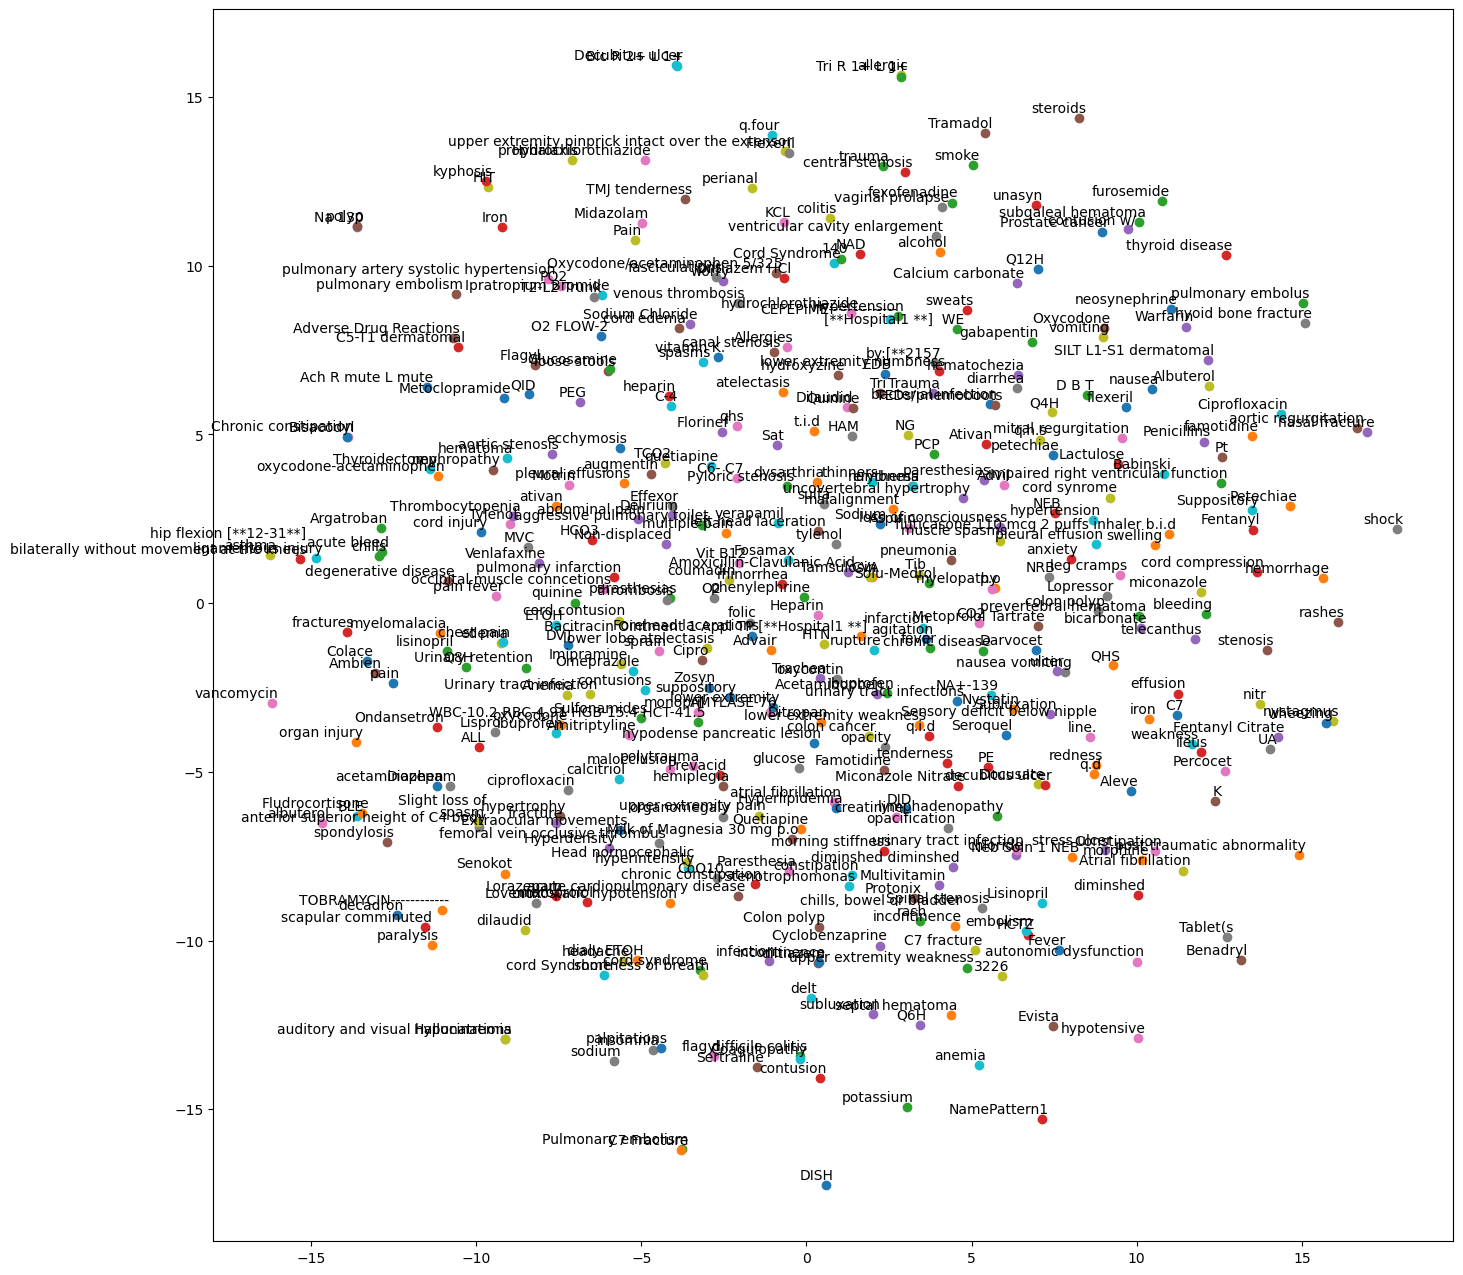

In [115]:
small_df2 = df2['TEXT'].to_list()[0:10]

corpus = []
for row in range(0, len(small_df2)):
    str_tokens = []
    tokens = nlp(small_df2[row]).ents
    for i in range(len(tokens)):
        str_tokens.append(tokens[i].text)
    corpus.append(str_tokens)

model = Word2Vec(corpus, min_count=1)

tsne_plot(model)

In [125]:
sickle_cell = merged[merged['SHORT_TITLE'].str.contains('sickle', case=False, na=False)]

df3 = pd.merge(sickle_cell, notes, on='HADM_ID')
df3.drop(columns=['ROW_ID', 'SUBJECT_ID_y'], inplace=True)
df3.rename(columns={'SUBJECT_ID_x': 'SUBJECT_ID'}, inplace=True)

df3 = df3[df3['CATEGORY'] == 'Discharge summary']

In [127]:
text = df3['TEXT'].to_list()[2]
doc = nlp(text)
displacy.render(doc, style='ent', jupyter=True)

c:\Users\alejm\miniconda3\envs\healthcareAI\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


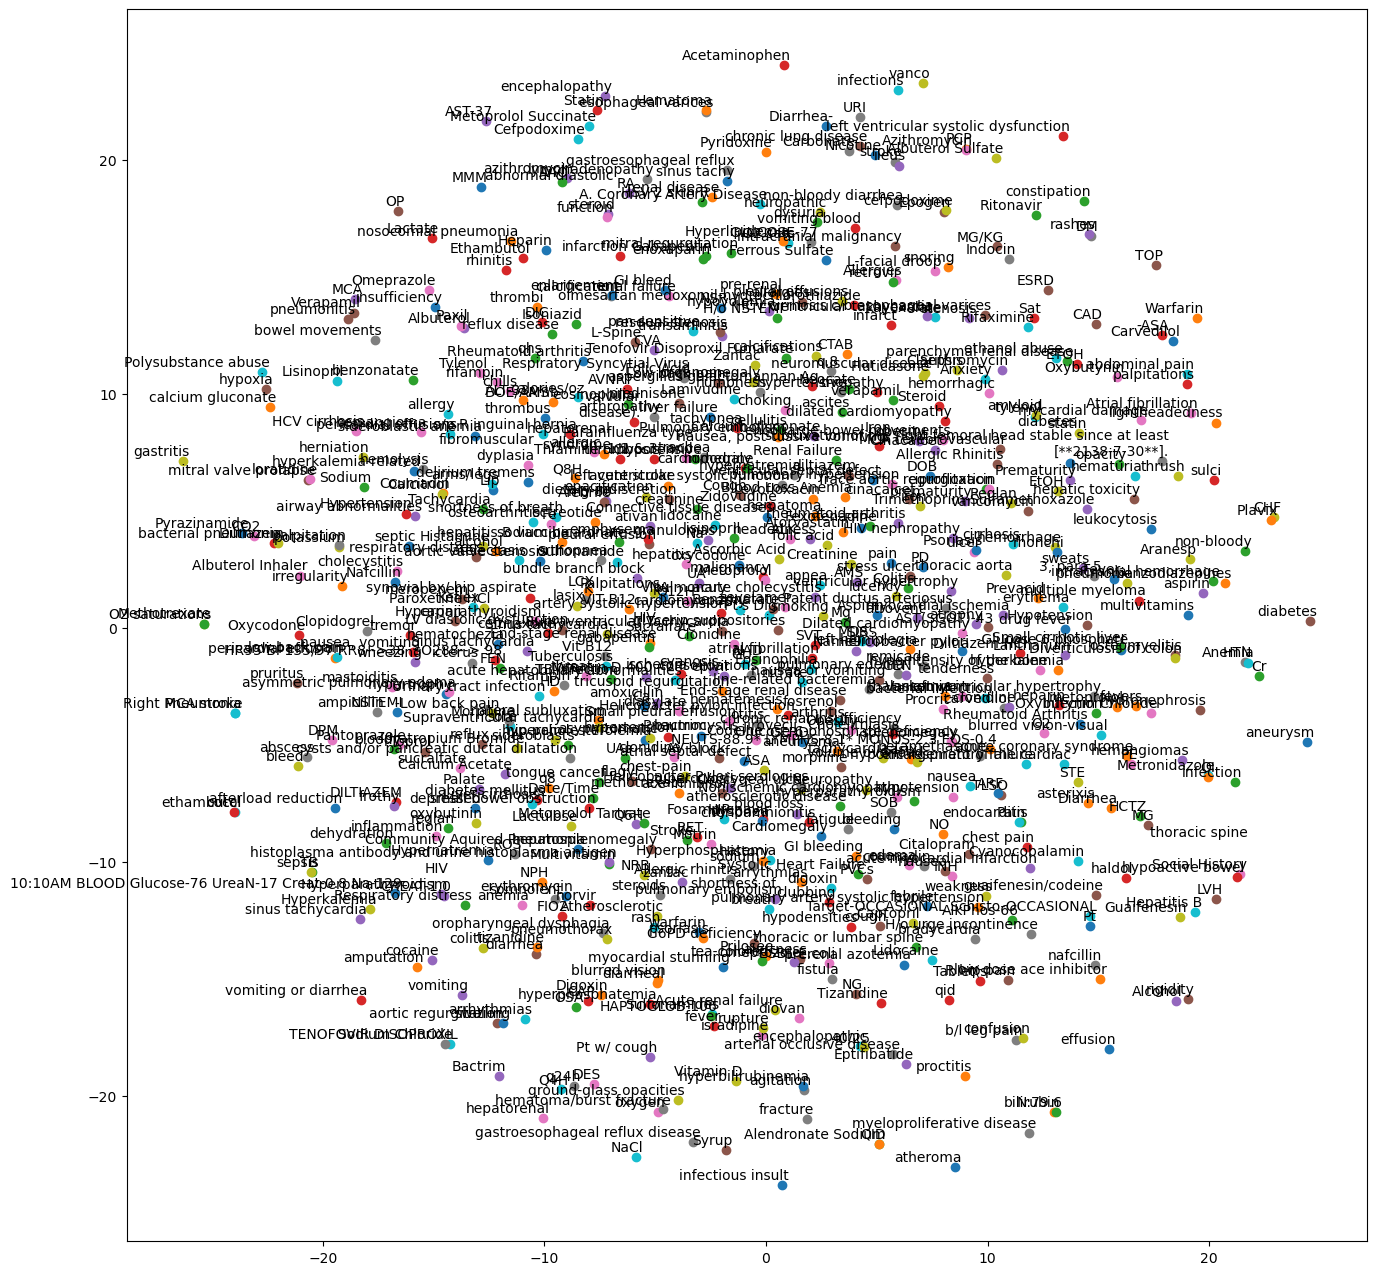

In [128]:
small_df3 = df3['TEXT'].to_list()[0:10]

corpus = []
for row in range(0, len(small_df3)):
    str_tokens = []
    tokens = nlp(small_df3[row]).ents
    for i in range(len(tokens)):
        str_tokens.append(tokens[i].text)
    corpus.append(str_tokens)

model = Word2Vec(corpus, min_count=1)

tsne_plot(model)